In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sowbarnigap","key":"a6ae8c781fe32788db68bc29b3e54f80"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
 ! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          21892        441  0.9411765        
sukhmandeepsinghbrar/housing-price-dataset                  Housing Price Dataset                          780KB  2024-04-04 19:45:43            884         24  1.0              
datascientist97/e-commerece-sales-data-2024                 E-commerece Sales Data 2024                      6MB  2024-04-05 12:32:58            653         25  1.0              
mohdshahnawazaadil/restaurant-dataset                       Restaurant Dataset                           

In [ ]:
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

 99% 1.23G/1.25G [00:17<00:00, 108MB/s]
100% 1.25G/1.25G [00:17<00:00, 75.9MB/s]


In [ ]:
!unzip plant-disease-recognition-dataset.zip

Archive:  plant-disease-recognition-dataset.zip
  inflating: Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: Test/Test/Healthy/8e7986d1ecd36445.jpg  
  inflating: Test/Test/Healthy/8e7e70a6878c1c79.jpg  
  inflating: Test/Test/Healthy/8e82b1a51bd11afe.jpg  
  inflating: Test/Test/Healthy/8e8470687be37378.jpg  
  inflating: Test/Test/Healthy/8e858c8397706b7b.jpg  
  inflating: Test/Test/Healthy/8e8

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , auc , accuracy_score

import tensorflow as tf
from tensorflow import keras

from PIL import Image
import cv2
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Conv2D, Flatten,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

import warnings
warnings.filterwarnings('ignore')

In [4]:
#train data set import
path = "/content/Train/Train"
train = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 1322 files belonging to 3 classes.


In [5]:
#test data set import
path = "/content/Test/Test"
test = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 150 files belonging to 3 classes.


In [6]:
#valid data set import
path = "/content/Validation/Validation"
valid = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 60 files belonging to 3 classes.


In [7]:
#class labels print
class_labels = train.class_names
class_labels

['Healthy', 'Powdery', 'Rust']

In [8]:
print(len(train))
print(len(test))
print(len(valid))


42
5
2


In [9]:
for image_batch,image_label in train.take(1):
    print(image_batch[0])
    print(class_labels[image_label[0].numpy()])

tf.Tensor(
[[[103.58984  127.58984   77.58984 ]
  [104.84375  128.84375   80.84375 ]
  [110.4043   134.4043    86.4043  ]
  ...
  [ 84.97266  106.97266   58.21875 ]
  [103.46875  121.46875   83.46875 ]
  [114.75     131.75      95.75    ]]

 [[ 98.958984 122.958984  73.271484]
  [100.30078  124.30078   76.30078 ]
  [103.875    127.875     79.875   ]
  ...
  [103.25781  124.41406   80.94531 ]
  [106.23828  124.23828   85.92578 ]
  [108.44141  125.44141   89.65625 ]]

 [[104.98828  128.98828   80.98828 ]
  [101.70703  125.70703   77.70703 ]
  [104.1875   128.1875    80.1875  ]
  ...
  [ 87.021484 109.021484  60.896484]
  [108.58203  126.58203   86.58203 ]
  [ 96.740234 114.740234  75.29883 ]]

 ...

 [[140.16992  157.16992  121.16992 ]
  [137.13672  154.13672  120.13672 ]
  [134.8125   150.8125   121.8125  ]
  ...
  [103.322266 139.32227   75.322266]
  [105.9375   140.9375    76.9375  ]
  [107.96094  141.96094   80.96094 ]]

 [[139.61133  159.98633  121.45508 ]
  [141.95508  158.95508  1

In [10]:
plt.figure(figsize=(20,20))
for image_batch , image_label in train.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[image_label[i].numpy()])
        plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

In [11]:
resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

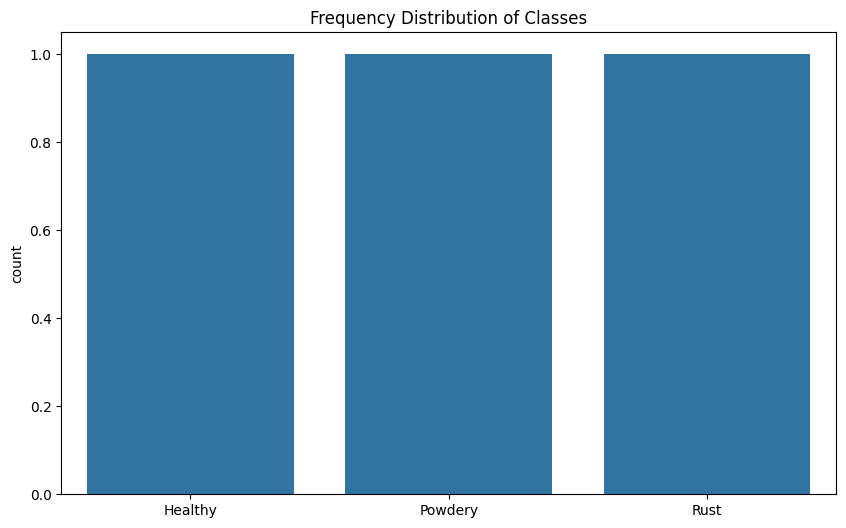

In [12]:
# Frequency distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(x=train.class_names)
plt.title('Frequency Distribution of Classes')
plt.show()

In [13]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.3),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [14]:
IMAGE_SIZE=256
CHANNELS=3
BATCH_SIZE=32
EPOCHS=10

input_shape=(BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model= tf.keras.models.Sequential([
  resizing_and_rescaling,
  data_augmentation,
  # Convolution layer 1
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 2
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 3
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 4
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Flatten Layers
  tf.keras.layers.Flatten(),

  # Dense layers
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=100,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=3,activation='softmax')

])

model.build(input_shape=input_shape)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [16]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(train ,  batch_size=32 ,epochs=10,
                verbose=1,
                validation_data=valid) # epochs=10


Epoch 1/10
42/42 [==============================] - 358s 8s/step - loss: 1.0915 - accuracy: 0.3525 - val_loss: 1.2748 - val_accuracy: 0.3333
Epoch 2/10
42/42 [==============================] - 352s 8s/step - loss: 0.9029 - accuracy: 0.5363 - val_loss: 1.0342 - val_accuracy: 0.4167
Epoch 3/10
42/42 [==============================] - 338s 8s/step - loss: 0.6061 - accuracy: 0.7542 - val_loss: 0.5962 - val_accuracy: 0.7500
Epoch 4/10
42/42 [==============================] - 343s 8s/step - loss: 0.5639 - accuracy: 0.7965 - val_loss: 0.6715 - val_accuracy: 0.7833
Epoch 5/10
42/42 [==============================] - 333s 8s/step - loss: 0.3241 - accuracy: 0.8933 - val_loss: 0.2559 - val_accuracy: 0.9333
Epoch 6/10
42/42 [==============================] - 349s 8s/step - loss: 0.3024 - accuracy: 0.8926 - val_loss: 0.4478 - val_accuracy: 0.8667
Epoch 7/10
42/42 [==============================] - 345s 8s/step - loss: 0.3276 - accuracy: 0.8911 - val_loss: 0.2168 - val_accuracy: 0.9000
Epoch 8/10
42

In [17]:
#Accuracy and loss on Train and Test
loss,acc = model.evaluate(train)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(test)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

42/42 [==============================] - 130s 3s/step - loss: 0.1313 - accuracy: 0.9523
Loss on Train data: 0.13131418824195862
Accuracy on Train data: 0.9523449540138245
5/5 [==============================] - 14s 2s/step - loss: 0.2560 - accuracy: 0.9267
Loss on Test data: 0.2560289204120636
Accuracy on Test data: 0.9266666769981384


In [18]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

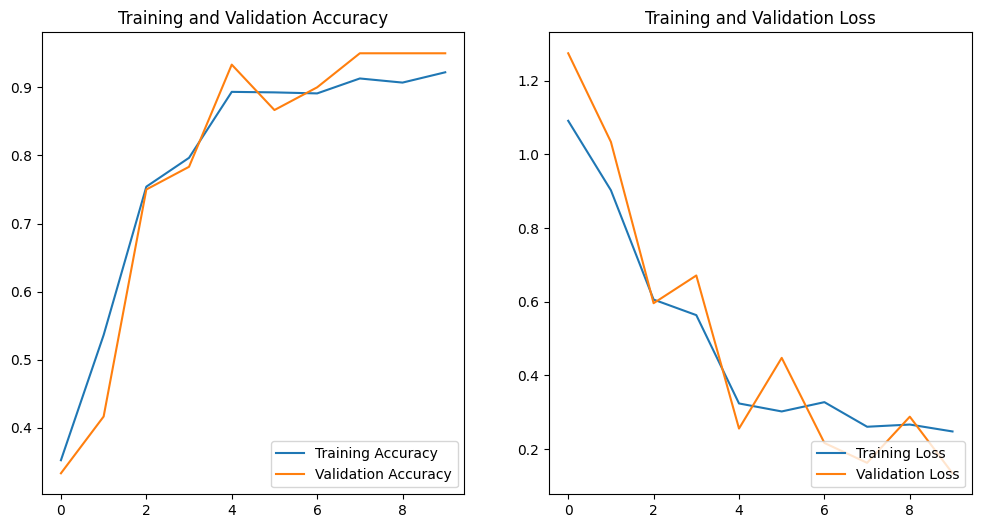

In [19]:
EPOCHS=10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [20]:
#Image Predictions on Test Data
def Prediction(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array((images[i].numpy()))
    img_array = tf.expand_dims(img_array,0)     # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class , confidence

In [21]:
plt.figure(figsize=(20,25))
for images , labels in test.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_labels[labels[i]])


        predicted_class , confidence = Prediction(model,images[i].numpy())
        actual_class = class_labels[labels[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence:{confidence}%")
        plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.